![](https://lh3.googleusercontent.com/url?sa=i&url=https%3A%2F%2Faihub.org%2F2024%2F05%2F15%2Fintroducing-africlimate-ai%2F&psig=AOvVaw3Kq4dEgmPFIA9-UeqWb4lf&ust=1724598696792000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCKi70_f0jYgDFQAAAAAdAAAAABAE)

![](https://aihub.org/wp-content/uploads/2024/05/AfriClimate-AI-logo.png)

A tutorial presented at the [AfriClimate AI](https://www.africlimate.ai/) Workshop during the [DLI 2024 Event](https://deeplearningindaba.com/2024/).


© AfriClimate AI. Apache License 2.0.

In [ ]:
#!pip install -qq gcsfs zarr dask cartopy
!pip install -qq zarr cartopy

# Benchmarking Reanalysis data with observation data from [TAHMO](https://tahmo.org/)

The Trans-African Hydro-Meteorological Observatory (TAHMO) aims to develop a vast network of weather stations across Africa. Current and historic weather data is important for agricultural, climate monitoring, and many hydro-meteorological applications.

<div>
<img src="https://tahmo.org/wp-content/uploads/2015/03/weatherstation_kenya.jpg" width="500"/>
</div>

TAHMO’s goal is to install 20,000 on-the-ground sensing stations every 30 km across the African continent, specifically designed to provide rainfall, temperature, and other critical data from robust redundant sensors.

The data recorded every five minutes is sent via a cellular network near real time to a server where the data undergoes quality control.

**In this tutorial we will be looking at data samples collected over Kenya.**

## Station centric evaluation vs ERA5 centric evaluation

Station-centric evaluation focuses on comparing ground-based observational data from specific weather stations to model outputs, providing localized accuracy insights. In contrast, ERA5 grid evaluation involves assessing model predictions over broader geographical grids, offering a regional perspective on model performance.

<div>
<img src="https://i.imgur.com/SlyIMvh.png" width="800"/>
</div>


**Which one would you rely more on if you were?**  
<div>
<img src=" https://images.emojiterra.com/google/noto-emoji/unicode-15.1/color/share/1f914.jpg" width="70"/>
</div>


*   A meteorologist in Nairobi who wants to validate the accuracy of ERA5 forecasts specifically for their city's weather station
*   A climate researcher studying regional climate trends in East Africa
*   A farmer in Bamako
*   A local government policymaker in Lusaka




## Loading Observation data

In [ ]:
# Run the code below to access cloud data files from the public AfriClimate AI bucket
from google.colab import auth
import pandas as pd
auth.authenticate_user()

In [ ]:
# list of all available stations in Kenya, switch stations and see the impact
list_kenya_stations=['TA00018', 'TA00025', 'TA00029', 'TA00030', 'TA00057', 'TA00077', 'TA00130', 'TA00141', 'TA00156', 'TA00354']
import pandas as pd
def get_tahmo_station_data(station_id='TA00025', return_all=False):

  # Directly read the specific station data
  obs_path = f'gs://africlimateai/tahmo/kenya/{station_id}.csv'
  df_data = pd.read_csv(obs_path)

  return df_data
# we can see two years of hourly data with several variables.
selected_station=list_kenya_stations[1]
df_data=get_tahmo_station_data(selected_station)
df_data.head()

,timestamp,atmosphericpressure AVG (kPa),lightningdistance AVG (km),lightningevents (-),precipitation (mm),radiation AVG (W/m2),relativehumidity AVG (-),soilmoisture AVG (m3/m3),soiltemperature AVG (degrees Celsius),temperature AVG (degrees Celsius),temperature MAX (degrees Celsius),temperature MIN (degrees Celsius),winddirection (degrees),windgusts MAX (m/s),windspeed AVG (m/s)
0,2020-01-01 00:00,82.203333,0.0,0.0,0.034,0.000000,0.953333,NaN,NaN,15.325000,15.6,15.1,12.395219,3.11,1.619167
1,2020-01-01 01:00,82.223333,0.0,0.0,0.034,0.000000,0.957500,NaN,NaN,14.808333,15.2,14.5,56.726896,2.24,0.879167
2,2020-01-01 02:00,82.262500,0.0,0.0,0.034,0.000000,0.951667,NaN,NaN,14.141667,14.4,13.9,46.555956,1.34,0.400000
3,2020-01-01 03:00,82.304167,0.0,0.0,0.034,5.750000,0.950000,NaN,NaN,13.941667,14.2,13.7,10.335988,1.75,0.724167
4,2020-01-01 04:00,82.360000,0.0,0.0,0.017,164.545455,0.980909,NaN,NaN,15.445455,17.0,14.3,8.784053,2.40,1.068182


### Aggregate to daily observations - Try it

---


How would you convert these hourly measurements to daily ? Try it by completing the following code

In [ ]:
import pandas as pd
df_data['timestamp'] = pd.to_...(df_data['timestamp'])
df_data_daily=df_data.set_index(..)
df_data_daily.resample(..)

#### Solution

In [ ]:
# Solution ?
import pandas as pd
df_data['timestamp'] = pd.to_datetime(df_data['timestamp'])
df_data_ts=df_data.set_index('timestamp')
df_tahmo_daily=df_data_ts.resample('D').mean()
df_tahmo_daily.head()
# is this result correct? There is one special column that did not like our transformation. Which is it?


,atmosphericpressure AVG (kPa),lightningdistance AVG (km),lightningevents (-),precipitation (mm),radiation AVG (W/m2),relativehumidity AVG (-),soilmoisture AVG (m3/m3),soiltemperature AVG (degrees Celsius),temperature AVG (degrees Celsius),temperature MAX (degrees Celsius),temperature MIN (degrees Celsius),winddirection (degrees),windgusts MAX (m/s),windspeed AVG (m/s)
timestamp,,,,,,,,,,,,,,
2020-01-01,82.263314,0.0,0.0,0.006375,262.864583,0.757787,NaN,NaN,18.694129,19.220833,18.225000,48.521536,4.732500,1.919230
2020-01-02,82.358037,0.0,0.0,0.004250,216.046402,0.803741,NaN,NaN,18.451673,18.879167,18.025000,52.592559,6.761667,2.795934
2020-01-03,82.444075,0.0,0.0,0.082208,204.833333,0.801402,NaN,NaN,18.692424,19.166667,18.195833,36.808513,6.542917,2.596089
2020-01-04,82.361402,0.0,0.0,0.002125,234.082702,0.797011,NaN,NaN,18.435417,18.875000,17.995833,41.363300,5.475000,2.195022
2020-01-05,82.237434,0.0,0.0,0.000000,246.632260,0.736455,NaN,NaN,19.908112,20.450000,19.416667,84.051237,4.317083,1.674489


In [ ]:
# Solution
df_tahmo_daily['precipitation (mm)'] = df_data_ts['precipitation (mm)'].resample('D').sum()
df_tahmo_daily.head()

,atmosphericpressure AVG (kPa),lightningdistance AVG (km),lightningevents (-),precipitation (mm),radiation AVG (W/m2),relativehumidity AVG (-),soilmoisture AVG (m3/m3),soiltemperature AVG (degrees Celsius),temperature AVG (degrees Celsius),temperature MAX (degrees Celsius),temperature MIN (degrees Celsius),winddirection (degrees),windgusts MAX (m/s),windspeed AVG (m/s)
timestamp,,,,,,,,,,,,,,
2020-01-01,82.263314,0.0,0.0,0.153,262.864583,0.757787,NaN,NaN,18.694129,19.220833,18.225000,48.521536,4.732500,1.919230
2020-01-02,82.358037,0.0,0.0,0.102,216.046402,0.803741,NaN,NaN,18.451673,18.879167,18.025000,52.592559,6.761667,2.795934
2020-01-03,82.444075,0.0,0.0,1.973,204.833333,0.801402,NaN,NaN,18.692424,19.166667,18.195833,36.808513,6.542917,2.596089
2020-01-04,82.361402,0.0,0.0,0.051,234.082702,0.797011,NaN,NaN,18.435417,18.875000,17.995833,41.363300,5.475000,2.195022
2020-01-05,82.237434,0.0,0.0,0.000,246.632260,0.736455,NaN,NaN,19.908112,20.450000,19.416667,84.051237,4.317083,1.674489


# ERA5 Centric Approach
## Temperature

In [ ]:
# loading ERA5 from WB2
import xarray as xr
era5 = xr.open_zarr(
    'gs://weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr')

In [ ]:
# Select a subset of the ERA5 dataset by specifying ranges for latitude, longitude, and time.
# This focuses on Kenya and time period that matches our TAHMO observation data.

era5_t2m = era5.sel(
    # Select latitude values between 5.5 (north) and -4.5 (south).
    # The slice is used to define the range of latitudes (the first value is the upper bound, the second is the lower bound).
    latitude=slice(5.5, -4.5),

    # Select longitude values between 32 (west) and 39 (east).
    # The slice defines the range of longitudes.
    longitude=slice(32, 39),

    # Select time values between '2022-01-01' and '2022-01-02'.
    # The slice is used to filter data for the specific date range.
    time=slice('2022-01-01', '2022-01-02')
)

# Extract the '2m_temperature' variable from the filtered ERA5 dataset.
era5_t2m = era5_t2m['2m_temperature']
era5_t2m


<xarray.DataArray '2m_temperature' (time: 8, latitude: 41, longitude: 29)> Size: 38kB
dask.array<getitem, shape=(8, 41, 29), dtype=float32, chunksize=(1, 41, 29), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 164B 5.5 5.25 5.0 4.75 ... -4.0 -4.25 -4.5
  * longitude  (longitude) float32 116B 32.0 32.25 32.5 ... 38.5 38.75 39.0
  * time       (time) datetime64[ns] 64B 2022-01-01 ... 2022-01-02T18:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

### Regridding TAHMO to match ERA5 - 6 hours

The below cell resamples the data to 6-hour intervals, and organizes it into a dictionary for further analysis.

In [ ]:
stations_metadata = pd.read_csv(f'gs://africlimateai/tahmo/kenya/stations_metadata.csv')

stations_meta_in_kenya = stations_metadata[stations_metadata.country == 'KE']
all_stations = {}

for station_code in stations_meta_in_kenya['station code']:

  df = pd.read_csv(f'gs://africlimateai/tahmo/kenya/{station_code}.csv')
  # Convert the 'timestamp' column to datetime format for time series analysis
  df.timestamp = pd.to_datetime(df.timestamp)
  df = df.set_index('timestamp')['temperature AVG (degrees Celsius)']
  # Resample the time series data to 6-hour intervals and compute the mean for each period
  all_stations[station_code] = df.resample('6h').mean()

meta = stations_meta_in_kenya.set_index('station code')

The next step is to regrid TAHMO weather station data by mapping each station's data to the nearest grid points in a predefined template (ERA5 template).

We also calculate the sum and count of data points at each grid location, and finally average the data to produce a temperature field in Kelvin.

In [ ]:
import numpy as np
import xarray as xr

def regrid_tahmo(template, all_stations):
  # Initialize two empty xarray objects: one for storing the sum of the station data (tahmo_sum)
  # and another for counting the number of data points at each grid location (tahmo_count)
  tahmo_sum = xr.zeros_like(template).compute()
  tahmo_count = xr.zeros_like(template).compute()

  for station_code, curr_station in all_stations.items():
    curr_station_meta = meta.loc[station_code]
    # Extract the latitude and longitude of the current station and match it with its timestamps
    station_coords = curr_station_meta[['latitude', 'longitude']].to_dict()
    station_coords['time'] = curr_station.index

    # Find the nearest grid point in the 'template' for the current station's coordinates
    _station_coords_in_template_grid = tahmo_sum.sel(station_coords, method='nearest')

    # Extract the latitude, longitude, and time of the nearest grid point in the template
    station_lat_in_template_grid = _station_coords_in_template_grid.latitude
    station_lon_in_template_grid = _station_coords_in_template_grid.longitude
    station_time_in_template_grid = _station_coords_in_template_grid.time

    tahmo_sum.loc[{
        'latitude': station_lat_in_template_grid,
        'longitude': station_lon_in_template_grid,
        'time': station_time_in_template_grid,
    }] = curr_station

    tahmo_count.loc[{
        'latitude': station_lat_in_template_grid,
        'longitude': station_lon_in_template_grid,
        'time': station_time_in_template_grid,
    }] = np.ones_like(curr_station)

  # Compute the mean by dividing the sum of data points by the count at each grid location
  tahmo_mean = tahmo_sum / tahmo_count
  # Convert the mean temperature data from Celsius to Kelvin
  tahmo_mean_in_K = tahmo_mean + 273.15

  return tahmo_mean_in_K

In [ ]:
gridded_tahmo = regrid_tahmo(era5_t2m, all_stations)

In [ ]:
mse_t2m_era5 = abs(gridded_tahmo - era5_t2m).mean(dim='time')
mse_t2m_era5.name = '2m_temperature_mse'
mse_t2m_era5

<xarray.DataArray '2m_temperature_mse' (latitude: 41, longitude: 29)> Size: 5kB
dask.array<mean_agg-aggregate, shape=(41, 29), dtype=float32, chunksize=(41, 29), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 164B 5.5 5.25 5.0 4.75 ... -4.0 -4.25 -4.5
  * longitude  (longitude) float32 116B 32.0 32.25 32.5 ... 38.5 38.75 39.0

In [ ]:
mse_t2m_era5 = mse_t2m_era5.compute()

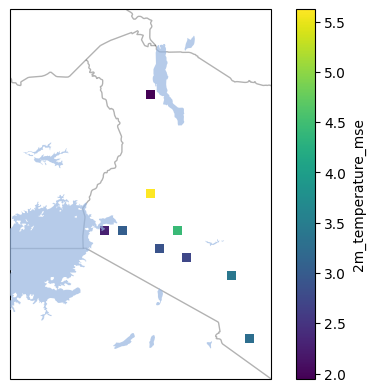

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

mse_t2m_era5.plot.imshow(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines(alpha=0.5)
ax.add_feature(cfeature.BORDERS, edgecolor='black', zorder=10, alpha=0.3)
ax.add_feature(cfeature.LAKES, zorder=10, alpha=0.7)
plt.show()

# Station centric : Querying Reanalysis data (ERA5) using DE Africa
## Precipitation

The [Digital Earth Africa](https://www.digitalearthafrica.org/) platform consists of a repository of Earth Observation data and a set of tools to view and analyse that data. It has a friendly load_era5() function that we will be using.


<div>
<img src="https://www.digitalearthafrica.org/sites/default/files/brand/inline/color/DE_Africa_Logo_Primary_RGB_1.png" width="300"/>
</div>

In [ ]:
!pip install deafrica_tools xarray[complete]

In [ ]:
from deafrica_tools.load_era5 import load_era5

In [ ]:
# TAHMO weather observation station Nairobi, Kenya
station_lat,station_log=stations_metadata[stations_metadata["station code"]==selected_station][["latitude","longitude"]].values[0]

resolution = 0.25

lat = (station_lat- resolution / 2, station_lat + resolution / 2)
lon = (station_log - resolution / 2, station_log + resolution / 2)


# Define the time window
time = '2020-01', '2022-12'

var = 'total_precipitation_24hr'

precip = load_era5(var, lat, lon, time)

In [ ]:
precip.total_precipitation_24hr

<xarray.DataArray 'total_precipitation_24hr' (time: 731, lat: 2, lon: 2)> Size: 12kB
dask.array<stack, shape=(731, 2, 2), dtype=float32, chunksize=(1, 2, 2), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 8B -1.25 -1.5
  * lon          (lon) float32 8B 36.75 37.0
  * time         (time) datetime64[ns] 6kB 2020-01-01 2020-01-02 ... 2021-12-31
    spatial_ref  int32 4B 4326
Attributes:
    long_name:     Total precipitation
    short_name:    tp
    units:         m
    grid_mapping:  spatial_ref

In [ ]:
# we sum the total_precipitation_24hr variable across the latitude and longitude dimensions
df_era5=precip.total_precipitation_24hr.sum(['lat','lon']).to_dataframe()
df_era5.head()

,spatial_ref,total_precipitation_24hr
time,,
2020-01-01,4326,0.002340
2020-01-02,4326,0.002141
2020-01-03,4326,0.003924
2020-01-04,4326,0.003601
2020-01-05,4326,0.001882


In [ ]:
# we then merge precipitation data on the basis of the time axis, for each day we get the precipitation observed by tahmo and those of ERA5
df_merged=df_tahmo_daily.rename_axis('time').join(df_era5)[['precipitation (mm)','total_precipitation_24hr']]
df_merged.head()

,precipitation (mm),total_precipitation_24hr
time,,
2020-01-01,0.153,0.002340
2020-01-02,0.102,0.002141
2020-01-03,1.973,0.003924
2020-01-04,0.051,0.003601
2020-01-05,0.000,0.001882


In [ ]:
#ERA5 total precipitation default unit is meters
df_merged['total_precipitation_24hr']=df_merged['total_precipitation_24hr']*1000

We are now able to compare on a daily basis the error between total precipitation recorded by TAHMO and those computed in ERA5.

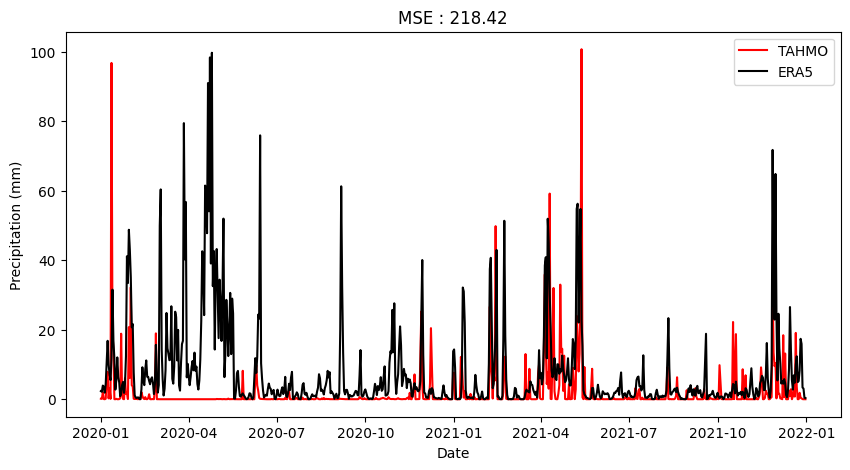

In [ ]:
import matplotlib.pyplot as plt
# We only compare when both TAHMO and ERA5 have records
df_merged=df_merged[df_merged.index<'2022-01-01']
mse = np.mean((df_merged['precipitation (mm)'] - df_merged['total_precipitation_24hr']) ** 2)
plt.figure(figsize=(10,5))
plt.title(f"MSE : {round(mse,2)}")
plt.plot(df_merged['precipitation (mm)'],label='TAHMO',color="red")
plt.plot(df_merged['total_precipitation_24hr'],label='ERA5',color="black")
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
plt.legend()
plt.show()

#Graphcast evaluation on Reanalysis data

In [ ]:
# we can load past foreacsts (hindsights) from graphcast
graphcast_path="gs://graphnn-historical-weather-forecasts/operational/forecasts_10d/date_range_2021-12-01_2022-12-22_6_hours.zarr/"
graphcast_forecast=xr.open_zarr(graphcast_path)
graphcast_forecast

<xarray.Dataset> Size: 21TB
Dimensions:                  (time: 1544, prediction_timedelta: 40, lat: 721,
                              lon: 1440, level: 13)
Coordinates:
  * lat                      (lat) float32 3kB -90.0 -89.75 -89.5 ... 89.75 90.0
    lead_time_secs           (prediction_timedelta) int64 320B dask.array<chunksize=(1,), meta=np.ndarray>
  * level                    (level) int32 52B 50 100 150 200 ... 850 925 1000
  * lon                      (lon) float32 6kB 0.0 0.25 0.5 ... 359.5 359.8
  * prediction_timedelta     (prediction_timedelta) timedelta64[ns] 320B 06:0...
  * time                     (time) datetime64[ns] 12kB 2021-12-01 ... 2022-1...
Data variables:
    10m_u_component_of_wind  (time, prediction_timedelta, lat, lon) float32 256GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind  (time, prediction_timedelta, lat, lon) float32 256GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature           (time, prediction_timedelta, lat, lon) float32 256GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential             (time, prediction_timedelta, level, lat, lon) float32 3TB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure  (time, prediction_timedelta, lat, lon) float32 256GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    specific_humidity        (time, prediction_timedelta, level, lat, lon) float32 3TB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    temperature              (time, prediction_timedelta, level, lat, lon) float32 3TB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_precipitation_6hr  (time, prediction_timedelta, lat, lon) float32 256GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind      (time, prediction_timedelta, level, lat, lon) float32 3TB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind      (time, prediction_timedelta, level, lat, lon) float32 3TB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    vertical_velocity        (time, prediction_timedelta, level, lat, lon) float32 3TB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
Attributes:
    end_forecast_date:        2022-12-22
    evaluation_wid:           3
    evaluation_xid:           99140631
    label:                    forecasts_10d
    model_input_data_type:    default
    model_wid:                3
    model_xid:                59572747
    random_seed:              0
    start_forecast_date:      2021-12-01
    time_between_forecasts:   6 hours
    use_best:                 False
    use_synthetic_radiation:  True

### Selecting a smaller area around our station

In [ ]:
# let's narrow down the forecast to our area of interest, i.e. Nairobi

# TAHMO weather observation station Nairobi, Kenya
station_lat,station_log=stations_metadata[stations_metadata["station code"]==selected_station][["latitude","longitude"]].values[0]

resolution = 0.25
#Exercice : complete the following code
graphcast_forecast.sel(lat=slice(station_lat- ..,station_lat+..),lon=slice(station_log - ..,station_log + ..))

In [ ]:
#solution
graphcast_forecast_local=graphcast_forecast.sel(lat=slice(station_lat- resolution / 2,station_lat + resolution / 2),lon=slice(station_log - resolution / 2,station_log + resolution / 2))


### Aggregating to get daily forecast

In [ ]:
dates = pd.date_range(start='2021-12-01', end='2022-12-22').strftime('%Y-%m-%d').tolist()

In [ ]:
# Pre-compute the sum over latitude and longitude dimensions
precip_sum = graphcast_forecast_local.total_precipitation_6hr.sum(['lat', 'lon'])

# Filter for the specific prediction_timedelta
precip_filtered = precip_sum.sel(prediction_timedelta="21600000000000")


In [ ]:
precip_sum

<xarray.DataArray 'total_precipitation_6hr' (time: 1544,
                                             prediction_timedelta: 40)> Size: 247kB
dask.array<sum-aggregate, shape=(1544, 40), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
    lead_time_secs        (prediction_timedelta) int64 320B dask.array<chunksize=(1,), meta=np.ndarray>
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 320B 06:00:0...
  * time                  (time) datetime64[ns] 12kB 2021-12-01 ... 2022-12-2...

In [ ]:
# sum precipitation over a month - this cell takes one minute for 100 days
precip_agg = [[day, precip_filtered.sel(time=day).values.sum()] for day in dates[:100]]

In [ ]:
forecast_df=pd.DataFrame(precip_agg,columns=['time','precipitation_forecast'])
forecast_df['time'] = pd.to_datetime(forecast_df['time'])
forecast_df['precipitation_forecast']=forecast_df['precipitation_forecast']*1000
forecast_df=forecast_df.set_index('time')
forecast_df.tail()

,precipitation_forecast
time,
2022-03-06,0.048734
2022-03-07,0.109577
2022-03-08,0.261685
2022-03-09,0.379569
2022-03-10,0.075353


In [ ]:
df_merged.tail()

,precipitation (mm),total_precipitation_24hr
time,,
2021-12-27,0.255,15.913112
2021-12-28,0.034,3.375723
2021-12-29,0.000,3.062775
2021-12-30,0.000,0.425498
2021-12-31,0.000,0.330921


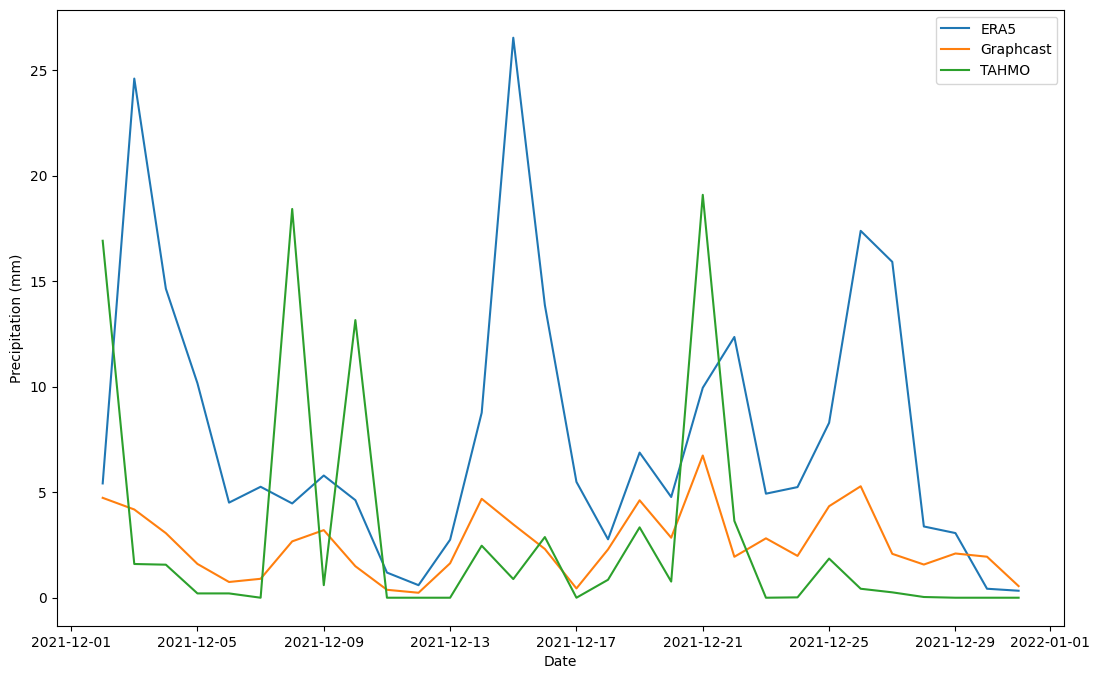

In [ ]:
combined_forecast=df_merged.join(forecast_df)
combined_forecast=combined_forecast[combined_forecast.index>'2021-12-01']
plt.figure(figsize=(13,8))
plt.plot(combined_forecast['total_precipitation_24hr'],label="ERA5")
plt.plot(combined_forecast['precipitation_forecast'],label="Graphcast")
plt.plot(combined_forecast['precipitation (mm)'],label="TAHMO")
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
plt.legend()
plt.show()

## Back to ERA5 centric Graphcast vs TAHMO

In [ ]:
graphcast = xr.open_zarr(
    'gs://graphnn-historical-weather-forecasts/era5/forecasts_10d/date_range_2021-12-01_2022-12-31_6_hours.zarr/',
    consolidated=True
).rename({
    'lat': 'latitude',
    'lon': 'longitude',
    'time': 'init_time',
})
graphcast

<xarray.Dataset> Size: 60TB
Dimensions:                  (init_time: 1580, prediction_timedelta: 40,
                              latitude: 721, longitude: 1440, level: 37)
Coordinates:
  * latitude                 (latitude) float32 3kB -90.0 -89.75 ... 89.75 90.0
    lead_time_secs           (prediction_timedelta) int64 320B dask.array<chunksize=(1,), meta=np.ndarray>
  * level                    (level) int64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float32 6kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta     (prediction_timedelta) timedelta64[ns] 320B 06:0...
  * init_time                (init_time) datetime64[ns] 13kB 2021-12-01 ... 2...
Data variables:
    10m_u_component_of_wind  (init_time, prediction_timedelta, latitude, longitude) float32 262GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind  (init_time, prediction_timedelta, latitude, longitude) float32 262GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature           (init_time, prediction_timedelta, latitude, longitude) float32 262GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential             (init_time, prediction_timedelta, level, latitude, longitude) float32 10TB dask.array<chunksize=(1, 1, 37, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure  (init_time, prediction_timedelta, latitude, longitude) float32 262GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    specific_humidity        (init_time, prediction_timedelta, level, latitude, longitude) float32 10TB dask.array<chunksize=(1, 1, 37, 721, 1440), meta=np.ndarray>
    temperature              (init_time, prediction_timedelta, level, latitude, longitude) float32 10TB dask.array<chunksize=(1, 1, 37, 721, 1440), meta=np.ndarray>
    total_precipitation_6hr  (init_time, prediction_timedelta, latitude, longitude) float32 262GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind      (init_time, prediction_timedelta, level, latitude, longitude) float32 10TB dask.array<chunksize=(1, 1, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind      (init_time, prediction_timedelta, level, latitude, longitude) float32 10TB dask.array<chunksize=(1, 1, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity        (init_time, prediction_timedelta, level, latitude, longitude) float32 10TB dask.array<chunksize=(1, 1, 37, 721, 1440), meta=np.ndarray>
Attributes:
    end_forecast_date:        2022-12-31
    evaluation_wid:           8
    evaluation_xid:           99140631
    label:                    forecasts_10d
    model_input_data_type:    default
    model_wid:                4
    model_xid:                50432171
    random_seed:              0
    start_forecast_date:      2021-12-01
    time_between_forecasts:   6 hours
    use_best:                 False
    use_synthetic_radiation:  True

In [ ]:
# we only select a subset of time deltas for predictions
import datetime
relevant_timedeltas = [
    datetime.timedelta(hours=12),
    datetime.timedelta(days=3),
    datetime.timedelta(days=10),
]

gc_t2m = graphcast.sel(
    latitude=slice(-4.5, 5.5),
    longitude=slice(32, 39),
    init_time=slice('2021', '2022')
).sel(
    prediction_timedelta=relevant_timedeltas
)['2m_temperature']

gc_t2m

<xarray.DataArray '2m_temperature' (init_time: 1580, prediction_timedelta: 3,
                                    latitude: 41, longitude: 29)> Size: 23MB
dask.array<getitem, shape=(1580, 3, 41, 29), dtype=float32, chunksize=(1, 1, 41, 29), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float32 164B -4.5 -4.25 -4.0 ... 5.25 5.5
    lead_time_secs        (prediction_timedelta) int64 24B dask.array<chunksize=(1,), meta=np.ndarray>
  * longitude             (longitude) float32 116B 32.0 32.25 ... 38.75 39.0
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 24B 0 days 1...
  * init_time             (init_time) datetime64[ns] 13kB 2021-12-01 ... 2022...

In [ ]:
gc_tahmo_abs_error = abs(gridded_tahmo - gc_t2m)
gc_tahmo_abs_error

<xarray.DataArray '2m_temperature' (time: 8, latitude: 41, longitude: 29,
                                    init_time: 1580, prediction_timedelta: 3)> Size: 180MB
dask.array<abs, shape=(8, 41, 29, 1580, 3), dtype=float32, chunksize=(8, 41, 29, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float32 164B 5.5 5.25 5.0 ... -4.25 -4.5
  * longitude             (longitude) float32 116B 32.0 32.25 ... 38.75 39.0
  * time                  (time) datetime64[ns] 64B 2022-01-01 ... 2022-01-02...
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 24B 0 days 1...
  * init_time             (init_time) datetime64[ns] 13kB 2021-12-01 ... 2022...
    lead_time_secs        (prediction_timedelta) int64 24B dask.array<chunksize=(1,), meta=np.ndarray>

In [ ]:


forecast_valid_time = gc_t2m.init_time + gc_t2m.prediction_timedelta

mse_t2m_gc = gc_tahmo_abs_error.where(
    forecast_valid_time == gridded_tahmo.time
).mean(dim=('time', 'init_time'))

mse_t2m_gc

<xarray.DataArray '2m_temperature' (latitude: 41, longitude: 29,
                                    prediction_timedelta: 3)> Size: 14kB
dask.array<mean_agg-aggregate, shape=(41, 29, 3), dtype=float32, chunksize=(41, 29, 1), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float32 164B 5.5 5.25 5.0 ... -4.25 -4.5
  * longitude             (longitude) float32 116B 32.0 32.25 ... 38.75 39.0
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 24B 0 days 1...
    lead_time_secs        (prediction_timedelta) int64 24B dask.array<chunksize=(1,), meta=np.ndarray>

## Found this tutorial interesting?


Join [AfriClimate AI](https://www.africlimate.ai/home) to be part of our monthly seminar series and technincal meetings by signing up to our community resgister [here](https://coda.io/d/AfriClimate-AI_d6xJUTAC1eN/Community_su7hr#_lu7rr).